In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker

import csv

# 1. Cleanup FLEXLAB test data

In [16]:
def read_rawdata(raw_data):
    df = pd.read_csv(raw_data, parse_dates=[0])
#     df.head()
#     df.index = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S')
#     df.columns = ['datetime']
    df.index = df.datetime
    return df

In [9]:
df = read_rawdata('smapTrendExport.csv')
df.head()

,datetime,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-AHU-CV1-POSN,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1B/1B-AHU-VFD-KW,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-CHWSTS-2,/x1ab_all/Power-1A/P1A-ActivePower17,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-CHWFM-2,/x1ab_all/Power-1B/P1B-ActivePower29,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1B/1B-CHWRTS-2,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1B/1B-CHWSTS-2,/x1ab_all/Power-1A/P1A-ActivePower19,...,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-CHWRTS-2,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-SAT-1,/x1ab_all/Power-1B/P1B-ActivePower3,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1B/1B-AHU-CV1-POSN,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1B/1B-SAT-1,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-RAT-1,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1B/1B-RAT-1,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1B/1B-CHWFM-2,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-CHWP-VFD,/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-AHU-VFD-KW
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-10 00:00:00,2019-12-10 00:00:00,2.291959,112.499985,11.620038,-0.008039,0.005418,-0.022234,11.707647,11.838983,0.158012,...,12.191705,25.495764,-0.033723,0.393784,25.139361,24.278281,24.179501,0.007188,-24.999669,112.499985
2019-12-10 00:05:00,2019-12-10 00:05:00,2.286469,112.499985,11.602691,-0.009023,0.010909,-0.026277,11.684004,11.815193,0.162261,...,12.175980,25.558395,-0.036200,0.397257,25.201009,24.284651,24.175662,0.006738,-24.999670,112.499985
2019-12-10 00:10:00,2019-12-10 00:10:00,2.289360,112.499985,11.562533,0.010299,0.005666,-0.022338,11.649123,11.776953,0.173893,...,12.137273,25.574308,-0.041345,0.405588,25.212179,24.288144,24.176571,0.006876,-24.999680,112.499985
2019-12-10 00:15:00,2019-12-10 00:15:00,2.289380,112.499985,11.534218,-0.010109,-0.001061,-0.020825,11.632848,11.756019,0.178356,...,12.121135,25.582275,-0.032124,0.402895,25.215870,24.300967,24.169514,0.006841,-24.999728,112.499985
2019-12-10 00:20:00,2019-12-10 00:20:00,2.290589,112.499985,11.518630,-0.020363,0.003680,-0.027112,11.620097,11.738596,0.199821,...,12.115290,25.603635,-0.034287,0.401614,25.218462,24.294300,24.169355,0.006797,-24.999655,112.499985


In [11]:
df.rename(columns={'/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-CHWRTS-2':'1A-CHWRTS-2',
                   '/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-CHWSTS-2':'1A-CHWSTS-2',
                   '/x1ab_all/Cell-HVAC-and-Perm-Sensors-1A/1A-CHWFM-2':'1A-CHWFM-2'}, inplace=True)

In [16]:
df['1A-CHW-Delta'] = df['1A-CHWRTS-2']-df['1A-CHWSTS-2']
df['1A_CLG_Load_W'] = df['1A-CHWFM-2']/3.7854118*df['1A-CHW-Delta']*1.8*500/3.412

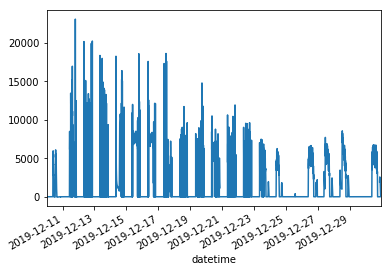

In [17]:
df['1A_CLG_Load_W'].plot()

In [18]:
df['1A_Heater_W']=df.filter(regex='P1A-ActivePower').sum(axis=1)

In [31]:
plug.head()

,datetime,1A-Plug,/x1ab_all/Processed Data/X1A/1A-Th-TotalHVAC,/x1ab_all/Processed Data/X1A/1A-Th-Chilled Water,/x1ab_all/Processed Data/X1A/1A-Th-Envelope,/x1ab_all/Processed Data/X1A/1A-RoomT,/x1ab_all/Processed Data/X1A/1A-Th-Hot Water,/x1ab_all/Processed Data/X1A/1A-El-Light,/x1ab_all/Processed Data/X1A/1A-SlabT,1A-Plug-Sch
datetime,,,,,,,,,,
2019-12-01 00:00:00,2019-12-01 00:00:00,0.440102,1511.734370,-0.316395,-1514.257141,23.693839,1056.455177,2.082669,23.561107,0.0
2019-12-01 00:05:00,2019-12-01 00:05:00,0.442014,1511.523088,-0.365010,-1514.060444,23.669558,1055.546510,2.095342,23.541219,0.0
2019-12-01 00:10:00,2019-12-01 00:10:00,0.380970,1515.575524,-0.324524,-1518.054657,23.669728,1060.162441,2.098163,23.535134,0.0
2019-12-01 00:15:00,2019-12-01 00:15:00,0.470982,1515.676081,-0.329400,-1518.227448,23.675209,1060.076177,2.080384,23.547568,0.0
2019-12-01 00:20:00,2019-12-01 00:20:00,0.466465,1513.854865,-0.479214,-1516.402505,23.655053,1058.704049,2.081176,23.532261,0.0


In [86]:
plug = read_rawdata('smapTrendExport_5mins.csv')
plug.head()
plug.rename(columns={'/x1ab_all/Processed Data/X1A/1A-El-Power Outlets':'1A-Plug',
                     '/x1ab_all/Processed Data/X1A/1A-Th-Chilled Water':'1A-ChilledWater',
                     '/x1ab_all/Processed Data/X1A/1A-RoomT':'1A-RoomT'}, inplace=True)

In [87]:
measured_cooling = np.abs(plug['2019-12-12':'2019-12-24'][['1A-ChilledWater']].resample('15min').mean())
measured_zoneTemp = np.abs(plug['2019-12-12':'2019-12-24'][['1A-RoomT']].resample('15min').mean())

# 2. Cleanup simulated data

In [74]:
# dateparse = lambda x: pd.datetime.strptime(x, ' %m/%d %H:%M:%S')
s_data = pd.read_csv('model_calibration/Flexlab_X1B_Calibrated.csv')
# date_range = pd.date_range('2019-12-01 00:00', '2019-12-31 23:45', freq='15min')
s_data.index = pd.date_range('2019-12-01 00:00', '2019-12-31 23:45', freq='15min')
s_data.head()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Outdoor Air Relative Humidity [%](TimeStep),FLEXLAB-X3-ELECROOM-ZONEA:Zone Air System Sensible Cooling Rate [W](TimeStep),FLEXLAB-X3-ELECROOM-ZONEA:Zone Air Temperature [C](TimeStep),FLEXLAB-X3-ELECROOM-ZONEB:Zone Air System Sensible Cooling Rate [W](TimeStep),FLEXLAB-X3-ELECROOM-ZONEB:Zone Air Temperature [C](TimeStep),FLEXLAB-X3-MECHROOM-ZONEA:Zone Air System Sensible Cooling Rate [W](TimeStep),FLEXLAB-X3-MECHROOM-ZONEA:Zone Air Temperature [C](TimeStep),FLEXLAB-X3-MECHROOM-ZONEB:Zone Air System Sensible Cooling Rate [W](TimeStep),...,FLEXLAB-X3-PLNMB:Zone Air System Sensible Cooling Rate [W](TimeStep),FLEXLAB-X3-PLNMB:Zone Air Temperature [C](TimeStep),FLEXLAB-X3-ZONEA:Zone Air System Sensible Cooling Rate [W](TimeStep),FLEXLAB-X3-ZONEA:Zone Air Temperature [C](TimeStep),FLEXLAB-X3-ZONEB-2:Zone Air System Sensible Cooling Rate [W](TimeStep),FLEXLAB-X3-ZONEB-2:Zone Air Temperature [C](TimeStep),FLEXLAB-X3-ZONEB-3:Zone Air System Sensible Cooling Rate [W](TimeStep),FLEXLAB-X3-ZONEB-3:Zone Air Temperature [C](TimeStep),FLEXLAB-X3-ZONEB-1:Zone Air System Sensible Cooling Rate [W](TimeStep),FLEXLAB-X3-ZONEB-1:Zone Air Temperature [C](TimeStep)
2019-12-01 00:00:00,12/01 00:15:00,12.1700,84.75,0.0,17.386703,0.0,17.180288,0.0,19.235987,0.0,...,0.0,19.218919,0.0,20.0,168.366605,20.0,17.406858,20.0,0.0,20.0
2019-12-01 00:15:00,12/01 00:30:00,11.9400,82.50,0.0,17.388446,0.0,17.181020,0.0,19.228330,0.0,...,0.0,19.111376,0.0,20.0,153.148813,20.0,0.000000,20.0,0.0,20.0
2019-12-01 00:30:00,12/01 00:45:00,11.7100,80.25,0.0,17.389918,0.0,17.181533,0.0,19.220067,0.0,...,0.0,19.003525,0.0,20.0,139.053230,20.0,0.000000,20.0,0.0,20.0
2019-12-01 00:45:00,12/01 01:00:00,11.4800,78.00,0.0,17.391056,0.0,17.181771,0.0,19.210862,0.0,...,0.0,18.897624,0.0,20.0,126.061014,20.0,0.000000,20.0,0.0,20.0
2019-12-01 01:00:00,12/01 01:15:00,11.3625,79.25,0.0,17.391780,0.0,17.181658,0.0,19.200722,0.0,...,0.0,18.800124,0.0,20.0,115.087631,20.0,0.000000,20.0,0.0,20.0


In [99]:
simulated_cooling = s_data['2019-12-12':'2019-12-24'].filter(regex='X3-ZONEA:Zone Air System Sensible Cooling Rate')
simulated_zoneTemp = s_data['2019-12-12':'2019-12-24'][['FLEXLAB-X3-ZONEA:Zone Air Temperature [C](TimeStep)']]

In [76]:
df2 = pd.concat([measured_cooling,simulated_cooling],axis=1)

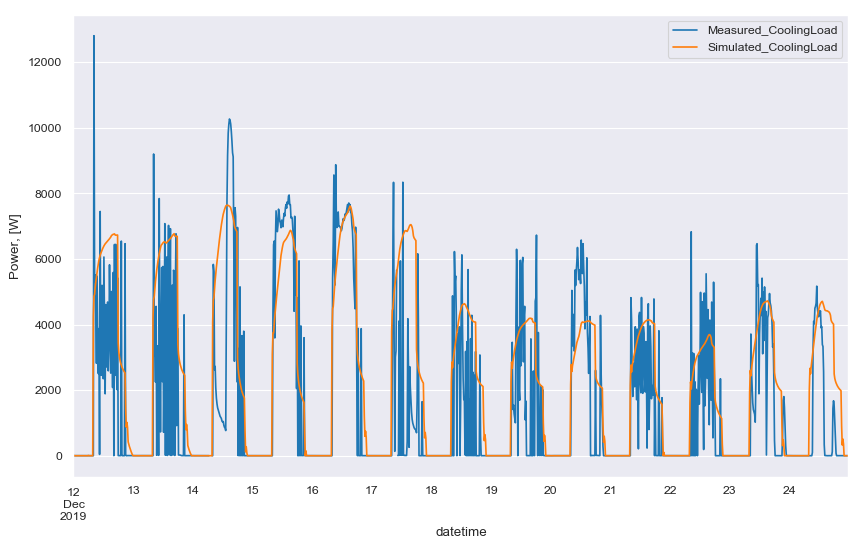

In [80]:
import seaborn as sns
# plt.style.use('seaborn')
plt.style.use('default')
sns.set_style('darkgrid')
# sns.set_palette(sns.color_palette("bright"))
sns.set_context('paper')
fig, (axes) = plt.subplots(1,1, figsize=(10, 6), facecolor='w', edgecolor='k', sharey=True, sharex=False)
fig.subplots_adjust(hspace = .1, wspace=.05)

df2.plot(ax=axes)
axes.legend(['Measured_CoolingLoad','Simulated_CoolingLoad'])
axes.set_ylabel('Power, [W]')
axes.set_xlabel('datetime')
# axes.set_ylim(0,30)
# axes.axvspan(*mdates.datestr2num(['2018-12-18 15:17:41', '2018-12-18 15:44:41']), color='red', alpha=0.1)
# axes.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# axes.xaxis.set_tick_params(rotation=0, ha='center')
# axes.set_xticklabels(rotation=40, ha='center')

# axes.xaxis.set_major_locator(ticker.MultipleLocator())

fig.savefig('Cooling_1st_1212.png', dpi=300, format='png',bbox_inches='tight')

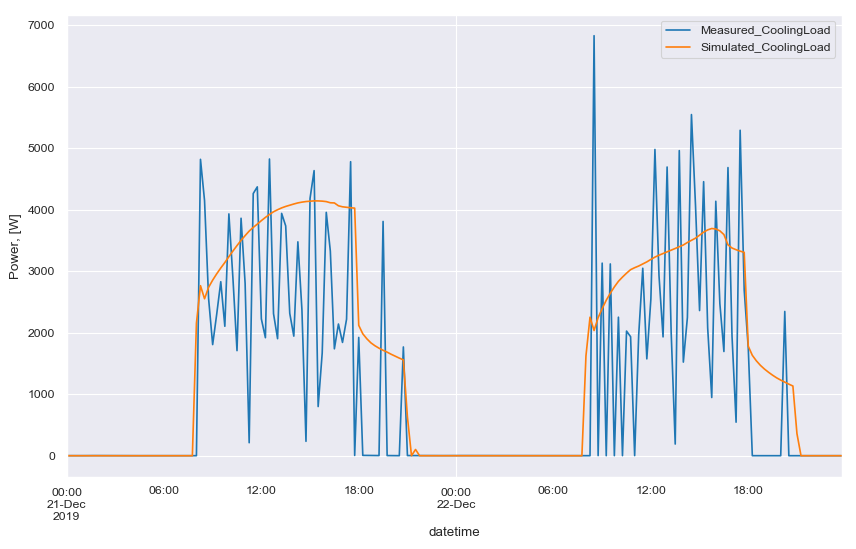

In [106]:
import seaborn as sns
# plt.style.use('seaborn')
plt.style.use('default')
sns.set_style('darkgrid')
# sns.set_palette(sns.color_palette("bright"))
sns.set_context('paper')
fig, (axes) = plt.subplots(1,1, figsize=(10, 6), facecolor='w', edgecolor='k', sharey=True, sharex=False)
fig.subplots_adjust(hspace = .1, wspace=.05)

df2['2019-12-21':'2019-12-22'].plot(ax=axes)
axes.legend(['Measured_CoolingLoad','Simulated_CoolingLoad'])
axes.set_ylabel('Power, [W]')
axes.set_xlabel('datetime')
# axes.set_ylim(0,30)
# axes.axvspan(*mdates.datestr2num(['2018-12-18 15:17:41', '2018-12-18 15:44:41']), color='red', alpha=0.1)
# axes.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# axes.xaxis.set_tick_params(rotation=0, ha='center')
# axes.set_xticklabels(rotation=40, ha='center')

# axes.xaxis.set_major_locator(ticker.MultipleLocator())

fig.savefig('CoolingReset_1st_1223.png', dpi=300, format='png',bbox_inches='tight')

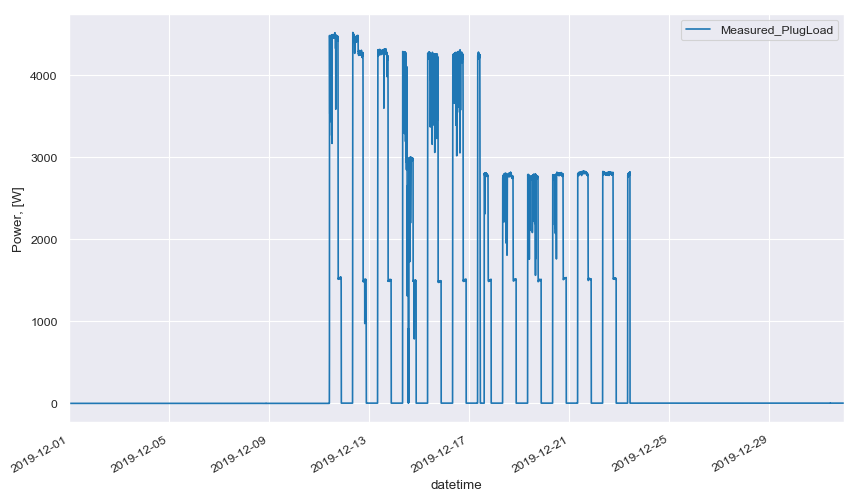

In [81]:
import seaborn as sns
# plt.style.use('seaborn')
plt.style.use('default')
sns.set_style('darkgrid')
# sns.set_palette(sns.color_palette("bright"))
sns.set_context('paper')
fig, (axes) = plt.subplots(1,1, figsize=(10, 6), facecolor='w', edgecolor='k', sharey=True, sharex=False)
fig.subplots_adjust(hspace = .1, wspace=.05)

plug['1A-Plug'].plot(ax=axes)
axes.legend(['Measured_PlugLoad'])
axes.set_ylabel('Power, [W]')
axes.set_xlabel('datetime')
# axes.set_ylim(0,30)
# axes.axvspan(*mdates.datestr2num(['2018-12-18 15:17:41', '2018-12-18 15:44:41']), color='red', alpha=0.1)
# axes.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# axes.xaxis.set_tick_params(rotation=0, ha='center')
# axes.set_xticklabels(rotation=40, ha='center')

# axes.xaxis.set_major_locator(ticker.MultipleLocator())

fig.savefig('Plug_1st_1212.png', dpi=300, format='png',bbox_inches='tight')

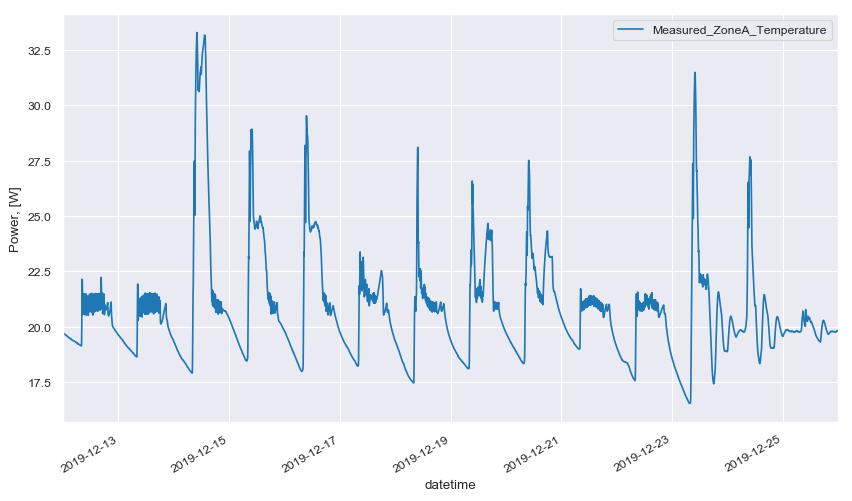

In [85]:
import seaborn as sns
# plt.style.use('seaborn')
plt.style.use('default')
sns.set_style('darkgrid')
# sns.set_palette(sns.color_palette("bright"))
sns.set_context('paper')
fig, (axes) = plt.subplots(1,1, figsize=(10, 6), facecolor='w', edgecolor='k', sharey=True, sharex=False)
fig.subplots_adjust(hspace = .1, wspace=.05)

plug['2019-12-12':'2019-12-25']['/x1ab_all/Processed Data/X1A/1A-RoomT'].plot(ax=axes)
axes.legend(['Measured_ZoneA_Temperature'])
axes.set_ylabel('Power, [W]')
axes.set_xlabel('datetime')
# axes.set_ylim(0,30)
# axes.axvspan(*mdates.datestr2num(['2018-12-18 15:17:41', '2018-12-18 15:44:41']), color='red', alpha=0.1)
# axes.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# axes.xaxis.set_tick_params(rotation=0, ha='center')
# axes.set_xticklabels(rotation=40, ha='center')

# axes.xaxis.set_major_locator(ticker.MultipleLocator())

fig.savefig('ZoneTemp_1st_1212.png', dpi=300, format='png',bbox_inches='tight')

In [82]:
plug.columns

Index(['datetime', '1A-Plug', '/x1ab_all/Processed Data/X1A/1A-Th-TotalHVAC',
       '1A-ChilledWater', '/x1ab_all/Processed Data/X1A/1A-Th-Envelope',
       '/x1ab_all/Processed Data/X1A/1A-RoomT',
       '/x1ab_all/Processed Data/X1A/1A-Th-Hot Water',
       '/x1ab_all/Processed Data/X1A/1A-El-Light',
       '/x1ab_all/Processed Data/X1A/1A-SlabT'],
      dtype='object')

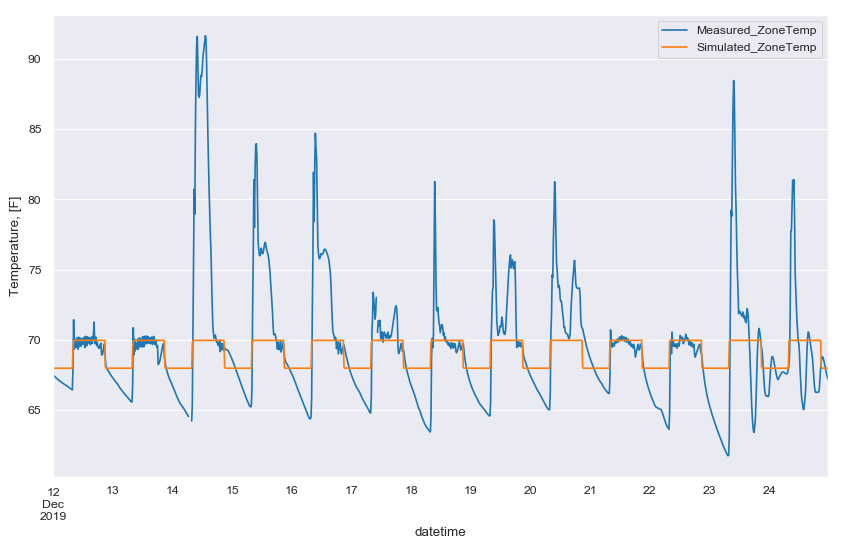

In [101]:
df3 = pd.concat([measured_zoneTemp,simulated_zoneTemp],axis=1)
df3 = df3*1.8+32

import seaborn as sns
# plt.style.use('seaborn')
plt.style.use('default')
sns.set_style('darkgrid')
# sns.set_palette(sns.color_palette("bright"))
sns.set_context('paper')
fig, (axes) = plt.subplots(1,1, figsize=(10, 6), facecolor='w', edgecolor='k', sharey=True, sharex=False)
fig.subplots_adjust(hspace = .1, wspace=.05)

df3.plot(ax=axes)
axes.legend(['Measured_ZoneTemp','Simulated_ZoneTemp'])
axes.set_ylabel('Temperature, [F]')
axes.set_xlabel('datetime')
# axes.set_ylim(0,30)
# axes.axvspan(*mdates.datestr2num(['2018-12-18 15:17:41', '2018-12-18 15:44:41']), color='red', alpha=0.1)
# axes.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# axes.xaxis.set_tick_params(rotation=0, ha='center')
# axes.set_xticklabels(rotation=40, ha='center')

# axes.xaxis.set_major_locator(ticker.MultipleLocator())

fig.savefig('ZoneTemp_1st_1212.png', dpi=300, format='png',bbox_inches='tight')

In [92]:
plug['1A-RoomT']

datetime
2019-12-01 00:00:00    23.693839
2019-12-01 00:05:00    23.669558
2019-12-01 00:10:00    23.669728
2019-12-01 00:15:00    23.675209
2019-12-01 00:20:00    23.655053
2019-12-01 00:25:00    23.648665
2019-12-01 00:30:00    23.618221
2019-12-01 00:35:00    23.603604
2019-12-01 00:40:00    23.598092
2019-12-01 00:45:00    23.592554
2019-12-01 00:50:00    23.592926
2019-12-01 00:55:00    23.600708
2019-12-01 01:00:00    23.610151
2019-12-01 01:05:00    23.636247
2019-12-01 01:10:00    23.656397
2019-12-01 01:15:00    23.668718
2019-12-01 01:20:00    23.671053
2019-12-01 01:25:00    23.702039
2019-12-01 01:30:00    23.691306
2019-12-01 01:35:00    23.694775
2019-12-01 01:40:00    23.690631
2019-12-01 01:45:00    23.676732
2019-12-01 01:50:00    23.674241
2019-12-01 01:55:00    23.683781
2019-12-01 02:00:00    23.686432
2019-12-01 02:05:00    23.700465
2019-12-01 02:10:00    23.713168
2019-12-01 02:15:00    23.715778
2019-12-01 02:20:00    23.717816
2019-12-01 02:25:00    23.719440
 

In [100]:
simulated_zoneTemp

,FLEXLAB-X3-ZONEA:Zone Air Temperature [C](TimeStep)
2019-12-12 00:00:00,20.000000
2019-12-12 00:15:00,20.000000
2019-12-12 00:30:00,20.000000
2019-12-12 00:45:00,20.000000
2019-12-12 01:00:00,20.000000
2019-12-12 01:15:00,20.000000
2019-12-12 01:30:00,20.000000
2019-12-12 01:45:00,20.000000
2019-12-12 02:00:00,20.000000
2019-12-12 02:15:00,20.000000


In [98]:
s_data['2019-12-12':'2019-12-24'][['FLEXLAB-X3-ZONEA:Zone Air Temperature [C](TimeStep)']]

,FLEXLAB-X3-ZONEA:Zone Air Temperature [C](TimeStep)
2019-12-12 00:00:00,20.000000
2019-12-12 00:15:00,20.000000
2019-12-12 00:30:00,20.000000
2019-12-12 00:45:00,20.000000
2019-12-12 01:00:00,20.000000
2019-12-12 01:15:00,20.000000
2019-12-12 01:30:00,20.000000
2019-12-12 01:45:00,20.000000
2019-12-12 02:00:00,20.000000
2019-12-12 02:15:00,20.000000
